In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
#haberman=pd.read_csv('/content/drive/MyDrive/Applied AI/Ass2-EDA_Haberman_Dataset/haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])

haberman=pd.read_csv('/content/drive/MyDrive/Applied_AI/Ass2-EDA_Haberman_Dataset/haberman.csv')
haberman.rename(columns={'year': 'operation_Year', 'nodes': 'axil_nodes', 'status': 'survival_status'}, inplace=True)
haberman.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

Dataset Info -
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year


In [3]:
print(haberman.shape)

(306, 4)


In [4]:
print(haberman.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [5]:
print(haberman.describe())

              age  operation_Year  axil_nodes  survival_status
count  306.000000      306.000000  306.000000       306.000000
mean    52.457516       62.852941    4.026144         1.264706
std     10.803452        3.249405    7.189654         0.441899
min     30.000000       58.000000    0.000000         1.000000
25%     44.000000       60.000000    0.000000         1.000000
50%     52.000000       63.000000    1.000000         1.000000
75%     60.750000       65.750000    4.000000         2.000000
max     83.000000       69.000000   52.000000         2.000000


In [6]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [7]:
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

# Observation - 
 This dataset is an imbalanced dataset as the number of data points for survival_status 1 i.e (the patient survived 5 years or longer) is larger as compared to survival_status 2 i.e (patient died within 5 years)

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

### **OBJECTIVE** -
The objective of dataset is to find out the survival_status as either 1 or 2, for the new patient based on 3 features i.e (age, operation_year, axil_nodes)

1 - the patient survived 5 years or more 
2 - patient died within 5 years

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

In [8]:
haberman_1 = haberman.loc[haberman["survival_status"] == 1];
haberman_2 = haberman.loc[haberman["survival_status"] == 2];

# **1-D scatter plot**

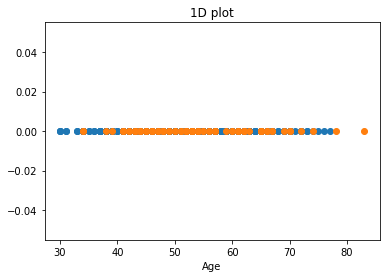

In [9]:
plt.plot(haberman_1["age"], np.zeros_like(haberman_1["age"]), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2["age"]), 'o')

plt.title('1D plot')
plt.xlabel('Age')
plt.show()

# Observation - 
The survival_status of the patient cannot be solely decided on basis of age by 1D scatter plot as it does not give clear picture for that survival of a patient

# **PDF**

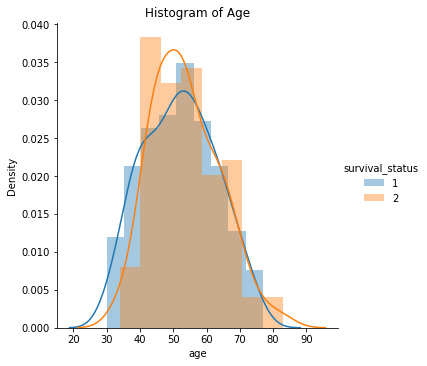

In [10]:
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of Age')
plt.show();

# Observation- 
The histogram depicts that patients of age less than 35 have higher chances of survival. 

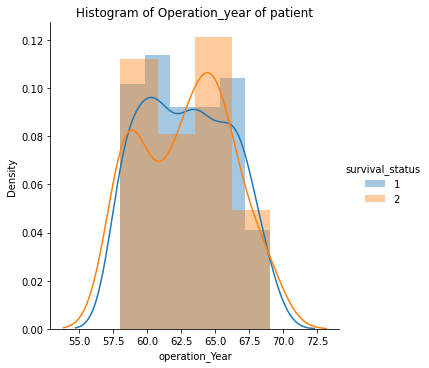

In [11]:
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "operation_Year") \
   .add_legend();
plt.title('Histogram of Operation_year of patient')
plt.show();

# Observation - 
This graph does not depict anything and so there seems to be no relation between survival status of patient and their year of operation

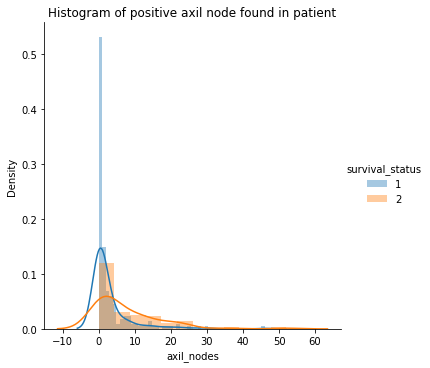

In [12]:
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title('Histogram of positive axil node found in patient')
plt.show();

# Observation-
If the number of positive auxilary nodes found in patient is between 0 to 2, there is almost 50+ % chances of survival. As the number of nodes found in patient increases, the chances of their survival decreases

# **CDF**

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


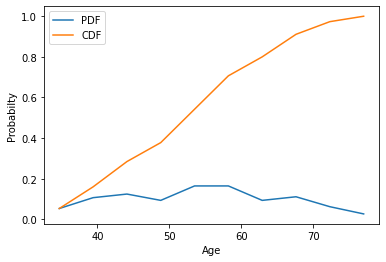

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


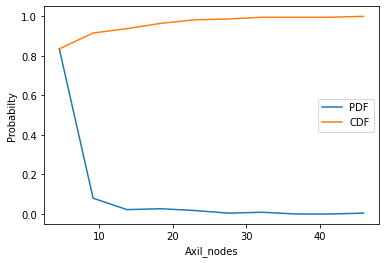

In [13]:
# Survival Status == 1
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(["PDF", "CDF"])
plt.show();


counts, bin_edges = np.histogram(haberman_1['axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_nodes')
plt.ylabel('Probabilty')
plt.legend(["PDF", "CDF"])
plt.show();

# Observation-
1) Patients of age > 65 , have less chances of survival and as the age increases, survival rate decreases
2) Patients in whom the axil nodes found were between 0 and 3 have good chances of survival with almost 80% cdf 

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


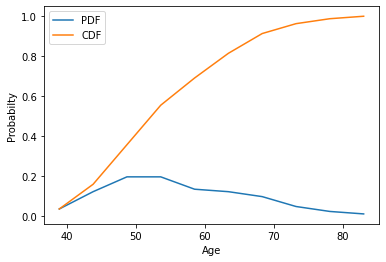

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


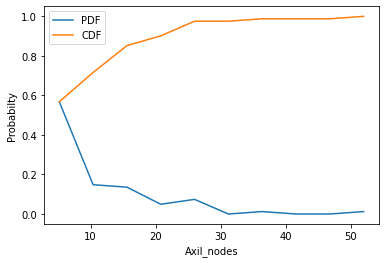

In [14]:
# Survival Status == 2
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(["PDF", "CDF"])
plt.show();

counts, bin_edges = np.histogram(haberman_2['axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_nodes')
plt.ylabel('Probabilty')
plt.legend(["PDF", "CDF"])
plt.show();


# Observation- 
1)Patient of age > 47 and age < 55 have died within 5 years
2)Around 70% Patients with axil nodes between 3 and 10 died within 5 years

# **Box plot and Whiskers**

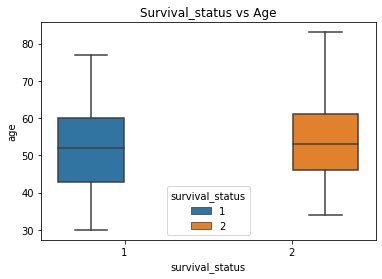

In [15]:
sns.boxplot(x='survival_status',y='age', data=haberman, hue= 'survival_status')
plt.title("Survival_status vs Age")
plt.show()

# Observation-
1) The median age for both survival_status is similar with 52 and 54 years respectively

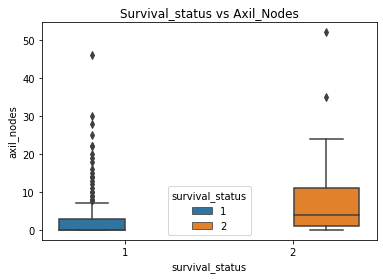

In [16]:
sns.boxplot(x='survival_status',y='axil_nodes', data=haberman, hue= 'survival_status')
plt.title("Survival_status vs Axil_Nodes")
plt.show()

# Observation-
1)The highest chances of survival of patient is when the positive nodes found is 0. 
2) Also most patients who died after 5 years had median of around 4 axil nodes found

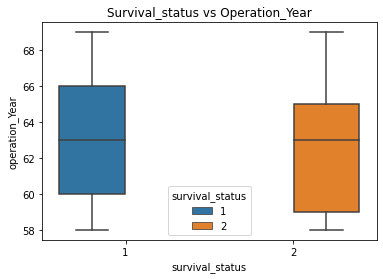

In [17]:
sns.boxplot(x='survival_status',y='operation_Year', data=haberman, hue= 'survival_status')
plt.title("Survival_status vs Operation_Year")
plt.show()

# Observation-
The boxplot of operation_year does not clearly depict anything

# **Violin Plots**

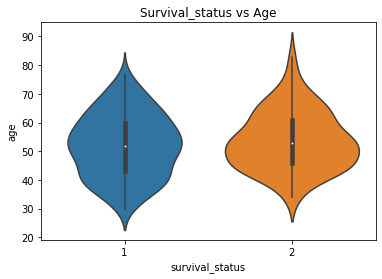

In [18]:
sns.violinplot(x="survival_status", y="age", data=haberman)
plt.title("Survival_status vs Age")
plt.show()

# Observation
1) There are more chances of survival if age is less than 35
2) If the age > 85, the patient has died after 5 years of operation

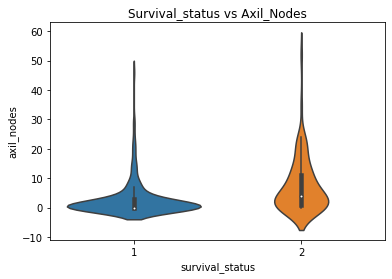

In [19]:
sns.violinplot(x="survival_status", y="axil_nodes", data=haberman)
plt.title("Survival_status vs Axil_Nodes")
plt.show()

# Observation
1)The highest chances of survival of patient is when the positive nodes found is 0. 2) Also most patients who died after 5 years had median of around 4 axil nodes found

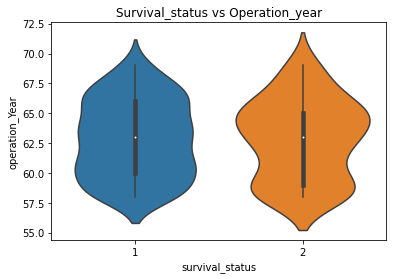

In [20]:
sns.violinplot(x="survival_status", y="operation_Year", data=haberman)
plt.title("Survival_status vs Operation_year")
plt.show()

# Observation
The boxplot of operation_year does not clearly depict anything

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


# **2D Scatter Plot**

Text(0.5, 1.0, '2-D Scatter plot with color-coding for each patients age and their number of positive axil nodes detected')

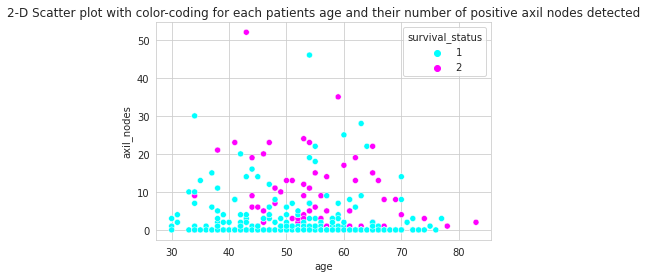

In [21]:
sns.set_style("whitegrid");
sns.scatterplot(data=haberman, x="age", y="axil_nodes", hue='survival_status', palette = 'cool')
plt.title('2-D Scatter plot with color-coding for each patients age and their number of positive axil nodes detected')

# Observation
1) At any age, if axil nodes found in patient is 0, the patient has survived, 
2) Between age 30 to 40, many patients survived irrespective of number of axil nodes found. But as the age increases and so the survival of patients decreases even though the count of axil nodes found in patient is less than 6 

Text(0.5, 1.0, '2-D Scatter plot with color-coding for each patients age and operation_year')

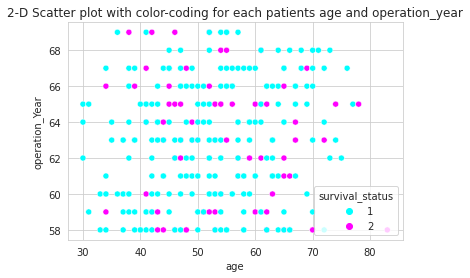

In [22]:
sns.set_style("whitegrid");
sns.scatterplot(data=haberman, x="age", y="operation_Year", hue='survival_status', palette = 'cool')
plt.title('2-D Scatter plot with color-coding for each patients age and operation_year')

# Observation
The 2D scatter plot between age and operation year does not provide much insight

Text(0.5, 1.0, '2-D Scatter plot with color-coding for each patients number of postive axil_nodes detected and operation_year')

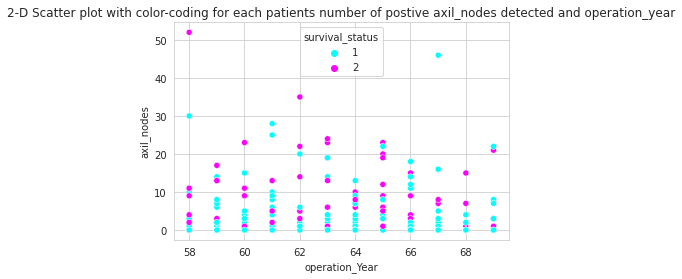

In [23]:
sns.set_style("whitegrid");
sns.scatterplot(data=haberman, y="axil_nodes", x="operation_Year", hue='survival_status', palette = 'cool')
plt.title('2-D Scatter plot with color-coding for each patients number of postive axil_nodes detected and operation_year')

# Observation
For 2D scatter plot between axil_nodes and operation_year, if the number of nodes found in patient is more , lesser the chances of their survival, irrespective of their year of operation

# **PairPlot**

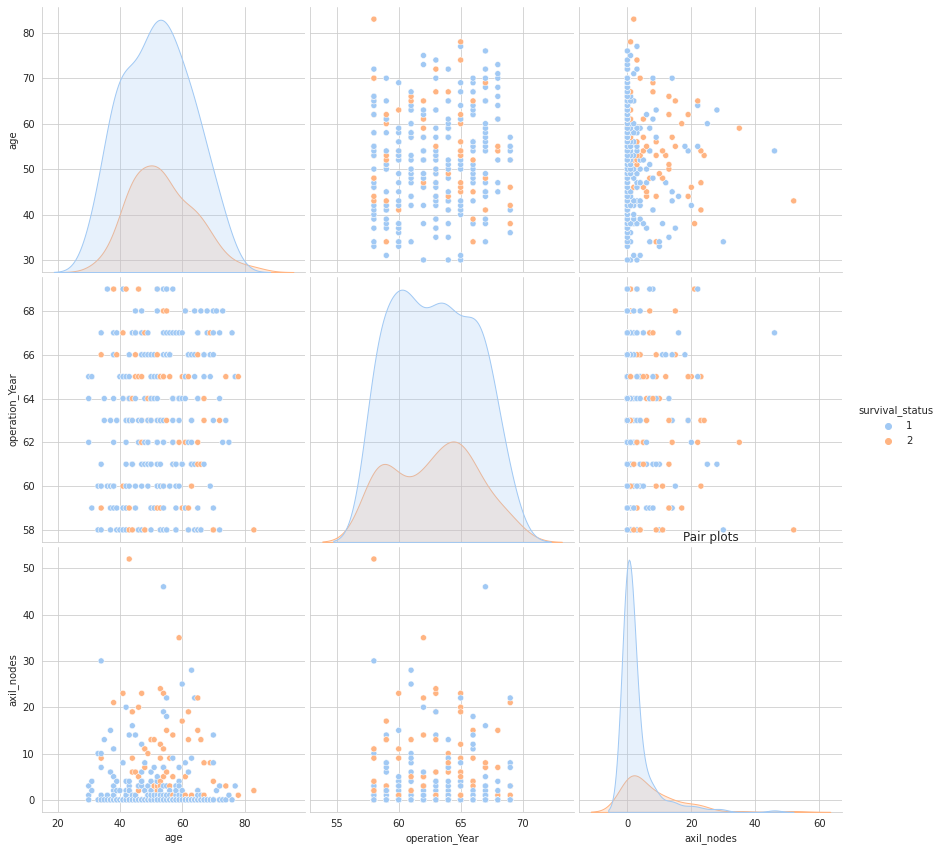

In [24]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", height = 4, palette = 'pastel');
plt.title('Pair plots')
plt.show()

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

# **Conclusion from Univariate Analysis:**

a) PDF and CDF:
1)If number of positive axil_nodes found in patient ranges from 0 to 3, there is ~82% chances of patients survival.
2)The patient aged 85 years or more, have ~0.05% chances of survival
3)If the number of positive axil_nodes found in patient ranges from 4 to 10, there is ~70% chances of patients not able to survive

b) BOXPLOT and VIOLIN PLOT:
1) Maximum chances of survival of patient is when nodes = 0
2) The median number of axil_nodes found for patients who died within 5 years of operation is 4 nodes

# **Conclusion from Bivariate Analysis:**

a) PairPlot and ScatterPlot
1) At any age, if axil nodes found in patient is 0, the patient has survived
2) Between age 30 to 40, many patients survived irrespective of number of axil nodes found. But as the age increases and so the survival of patients decreases

# **FINAL CONCLUSION-**
1. The dataset is imbalanced with 225 cases for patients who survived 5 years or longer and 81 patients who died within 5 years of operation
2. The survival_status of patient does not depend much on operation_Year.
3. Axil nodes is the column which can be used for classification as it provides maximum insights on survival status of patients
4. As the number of axil_nodes found in patient increases, lesser are the chance of survival of the patient. 


In [25]:
!jupyter nbconvert --to html /content/EDA_on_Haberman_Dataset.ipynb

[NbConvertApp] Converting notebook /content/EDA_on_Haberman_Dataset.ipynb to html
[NbConvertApp] Writing 897087 bytes to /content/EDA_on_Haberman_Dataset.html
